# ➡️Exploratory Data Analysis 1


# Loading Required Libraries

In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading CSV file

In [219]:
df = pd.read_csv('patients.csv')

In [220]:
df

,patient_id,admission_date,admission_time,discharge_time,age,gender,diagnosis,severity,wait_time_min,bed_id
0,1000,2025-01-01,2025-01-01 10:24:16.191727,2025-01-04 03:48:58.427951,95,F,Injury,Medium,28.9,62.0
1,1001,2025-01-01,2025-01-01 13:10:53.183831,2025-01-04 01:21:58.340759,57,F,Flu,Low,25.1,1.0
2,1002,2025-01-01,2025-01-01 00:20:43.597418,2025-01-01 06:16:03.729197,21,M,Injury,Low,42.7,62.0
3,1003,2025-01-01,2025-01-01 10:24:44.782494,2025-01-02 10:48:45.349494,47,M,Injury,Low,22.9,69.0
4,1004,2025-01-01,2025-01-01 22:39:12.234634,2025-01-07 17:13:29.680778,18,F,Injury,Medium,39.7,32.0
...,...,...,...,...,...,...,...,...,...,...
3963,4963,2025-04-30,2025-04-30 05:23:47.161241,2025-05-03 16:26:24.443336,65,M,Flu,Low,31.4,45.0
3964,4964,2025-04-30,2025-04-30 00:11:51.909087,2025-04-30 02:32:06.370283,29,M,Injury,Low,46.3,28.0
3965,4965,2025-04-30,2025-04-30 03:43:55.334069,2025-04-30 09:09:25.717291,47,M,Flu,Medium,31.3,80.0
3966,4966,2025-04-30,2025-04-30 17:57:37.940104,2025-05-01 09:52:37.340158,7,F,Flu,Medium,9.7,69.0


# Basic Data Checks

In [221]:
# Gives top 5 rows
df.head()  

,patient_id,admission_date,admission_time,discharge_time,age,gender,diagnosis,severity,wait_time_min,bed_id
0,1000,2025-01-01,2025-01-01 10:24:16.191727,2025-01-04 03:48:58.427951,95,F,Injury,Medium,28.9,62.0
1,1001,2025-01-01,2025-01-01 13:10:53.183831,2025-01-04 01:21:58.340759,57,F,Flu,Low,25.1,1.0
2,1002,2025-01-01,2025-01-01 00:20:43.597418,2025-01-01 06:16:03.729197,21,M,Injury,Low,42.7,62.0
3,1003,2025-01-01,2025-01-01 10:24:44.782494,2025-01-02 10:48:45.349494,47,M,Injury,Low,22.9,69.0
4,1004,2025-01-01,2025-01-01 22:39:12.234634,2025-01-07 17:13:29.680778,18,F,Injury,Medium,39.7,32.0


In [222]:
# Column info
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3968 entries, 0 to 3967
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patient_id      3968 non-null   int64  
 1   admission_date  3968 non-null   object 
 2   admission_time  3968 non-null   object 
 3   discharge_time  3877 non-null   object 
 4   age             3968 non-null   int64  
 5   gender          3968 non-null   object 
 6   diagnosis       3922 non-null   object 
 7   severity        3968 non-null   object 
 8   wait_time_min   3968 non-null   float64
 9   bed_id          3851 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 310.1+ KB


In [223]:
# Shape
df.shape

(3968, 10)

In [224]:
# Column names
print(df.columns.tolist())

['patient_id', 'admission_date', 'admission_time', 'discharge_time', 'age', 'gender', 'diagnosis', 'severity', 'wait_time_min', 'bed_id']


In [225]:
# Data types
print(df.dtypes)

patient_id          int64
admission_date     object
admission_time     object
discharge_time     object
age                 int64
gender             object
diagnosis          object
severity           object
wait_time_min     float64
bed_id            float64
dtype: object


# Missing Values


In [226]:
print("Missing values in each column:")
print(df.isnull().sum())


Missing values in each column:
patient_id          0
admission_date      0
admission_time      0
discharge_time     91
age                 0
gender              0
diagnosis          46
severity            0
wait_time_min       0
bed_id            117
dtype: int64


In [227]:
for col in df.select_dtypes(include='object').columns:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())



Value counts for admission_date:
admission_date
2025-02-25    66
2025-02-22    61
2025-02-14    60
2025-02-10    58
2025-02-04    57
              ..
2025-04-09    18
2025-04-05    18
2025-01-22    17
2025-04-04    16
2025-04-26    13
Name: count, Length: 120, dtype: int64

Value counts for admission_time:
admission_time
2025-01-01 10:24:16.191727    1
2025-03-15 04:44:39.472878    1
2025-03-14 00:32:33.355776    1
2025-03-14 17:17:59.149499    1
2025-03-14 20:50:01.734313    1
                             ..
2025-02-10 08:05:22.965685    1
2025-02-10 03:18:26.178136    1
2025-02-10 13:43:36.079312    1
2025-02-10 15:44:49.528697    1
2025-04-30 20:39:02.286867    1
Name: count, Length: 3968, dtype: int64

Value counts for discharge_time:
discharge_time
2025-01-04 03:48:58.427951    1
2025-03-18 05:03:43.508904    1
2025-03-15 02:22:31.101566    1
2025-03-16 22:52:36.608847    1
2025-03-16 19:06:13.424699    1
                             ..
2025-02-10 09:36:52.954034    1
2025-02-12 

# Graphical Representation

# ➡️Histogram of columns

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


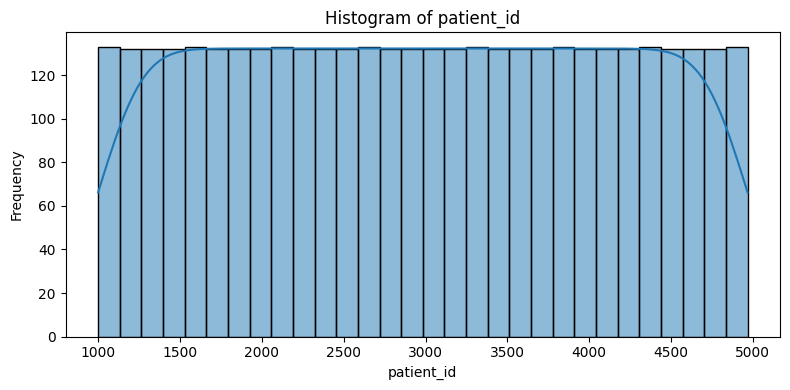

In [228]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.histplot(df['patient_id'], kde=True, bins=30)
plt.title('Histogram of patient_id')
plt.xlabel('patient_id')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


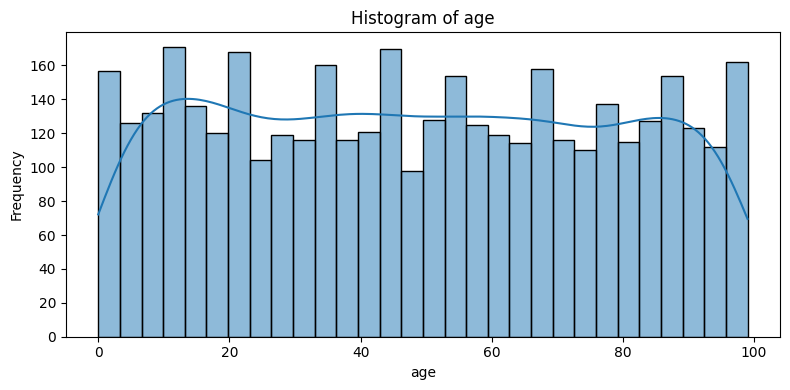

In [229]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Histogram of age')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


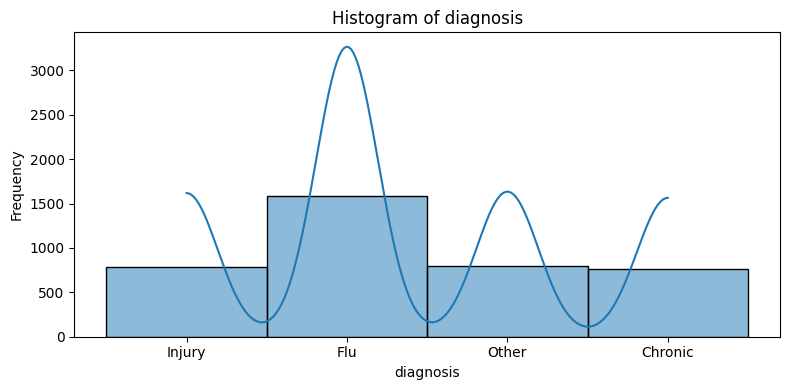

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.histplot(df['diagnosis'], kde=True, bins=30)
plt.title('Histogram of diagnosis')
plt.xlabel('diagnosis')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


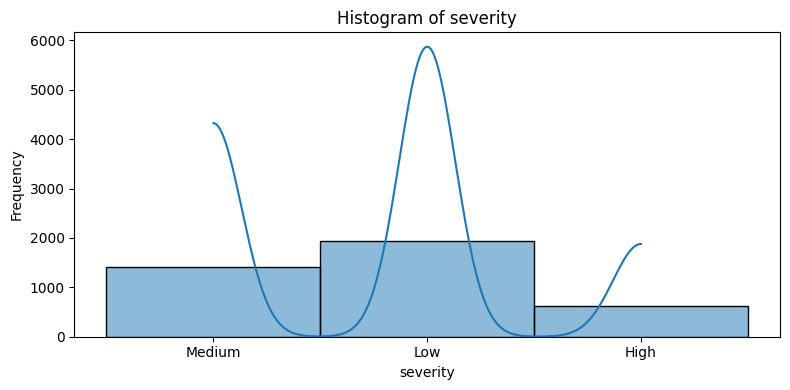

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.histplot(df['severity'], kde=True, bins=30)
plt.title('Histogram of severity')
plt.xlabel('severity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


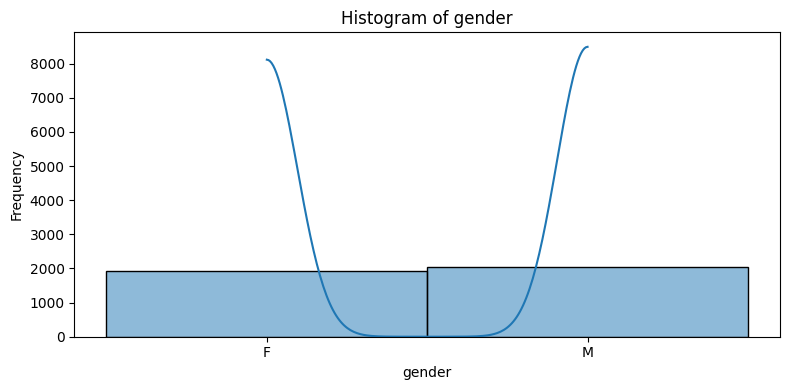

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.histplot(df['gender'], kde=True, bins=30)
plt.title('Histogram of gender')
plt.xlabel('gender')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# ➡️Boxplot – To Detect Outliers

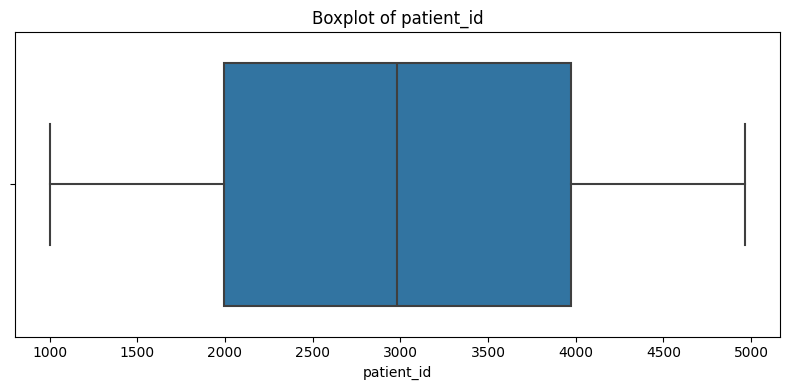

In [38]:
# Boxplot for patient_id
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['patient_id'])
plt.title('Boxplot of patient_id')
plt.tight_layout()
plt.show()

In [97]:
# Drop missing values if any
patient_id_series = df['patient_id'].dropna()

# Calculate Q1 and Q3
Q1 = patient_id_series.quantile(0.25)
Q3 = patient_id_series.quantile(0.75)

# Compute IQR
IQR = Q3 - Q1

print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR for patient_id : {IQR}")


Q1 (25th percentile): 1991.75
Q3 (75th percentile): 3975.25
IQR for patient_id : 1983.5


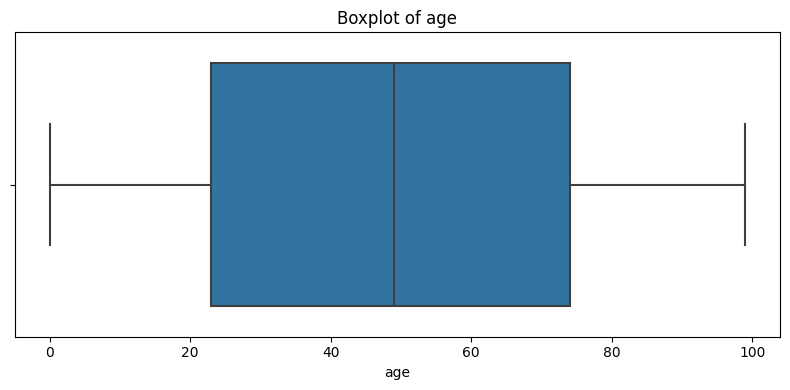

In [36]:
# Boxplot for age
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['age'])
plt.title('Boxplot of age')
plt.tight_layout()
plt.show()

In [93]:
# Drop missing values from 'age' column (if any)
age_series = df['age'].dropna()

# Calculate Q1 and Q3
Q1 = age_series.quantile(0.25)
Q3 = age_series.quantile(0.75)

# Compute IQR
IQR = Q3 - Q1

print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR for age: {IQR}")


Q1 (25th percentile): 23.0
Q3 (75th percentile): 74.0
IQR for age: 51.0


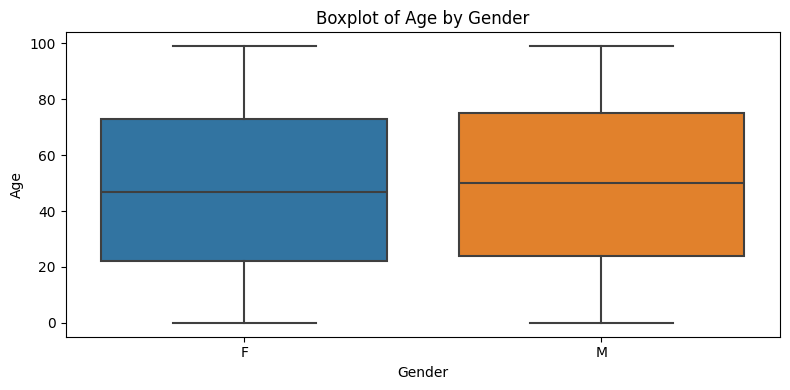

In [48]:
# Boxplot of Age by Gender
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.boxplot(x='gender', y='age', data=df)
plt.title('Boxplot of Age by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.tight_layout()
plt.show()


In [96]:
# Drop missing age values (optional if needed)
df_clean = df.dropna(subset=['age', 'gender'])

# Group by gender and calculate Q1, Q3, and IQR
iqr_by_gender = df_clean.groupby('gender')['age'].agg(
    Q1=lambda x: x.quantile(0.25),
    Q3=lambda x: x.quantile(0.75)
)

iqr_by_gender['IQR'] = iqr_by_gender['Q3'] - iqr_by_gender['Q1']

print(iqr_by_gender)


          Q1    Q3   IQR
gender                  
Female  22.0  73.0  51.0
Male    24.0  75.0  51.0


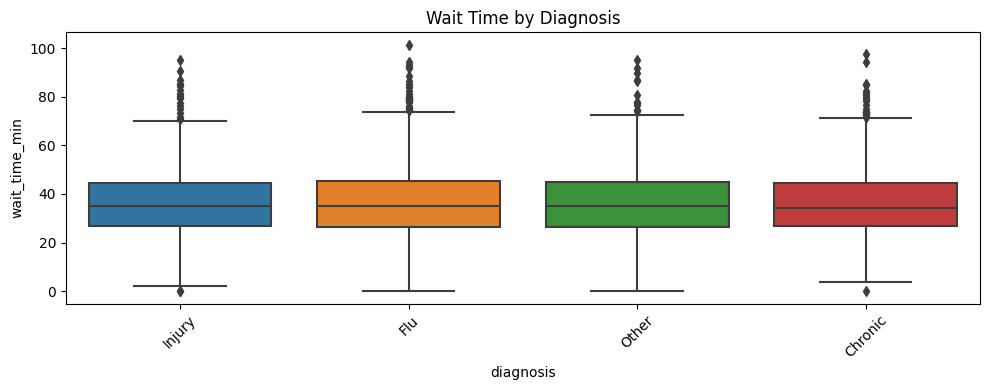

In [44]:
# Boxplot for diagnosis vs wait_time_min
plt.figure(figsize=(10, 4))
sns.boxplot(x='diagnosis', y='wait_time_min', data=df)
plt.title('Wait Time by Diagnosis')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [98]:
# Drop rows with missing diagnosis or wait_time_min
df_clean = df.dropna(subset=['diagnosis', 'wait_time_min'])

# Group by diagnosis and calculate Q1, Q3, and IQR
iqr_by_diagnosis = df_clean.groupby('diagnosis')['wait_time_min'].agg(
    Q1=lambda x: x.quantile(0.25),
    Q3=lambda x: x.quantile(0.75)
)

iqr_by_diagnosis['IQR'] = iqr_by_diagnosis['Q3'] - iqr_by_diagnosis['Q1']

print(iqr_by_diagnosis)


              Q1    Q3    IQR
diagnosis                    
Chronic    26.85  44.7  17.85
Flu        26.20  45.5  19.30
Injury     26.80  44.3  17.50
Other      26.20  44.9  18.70


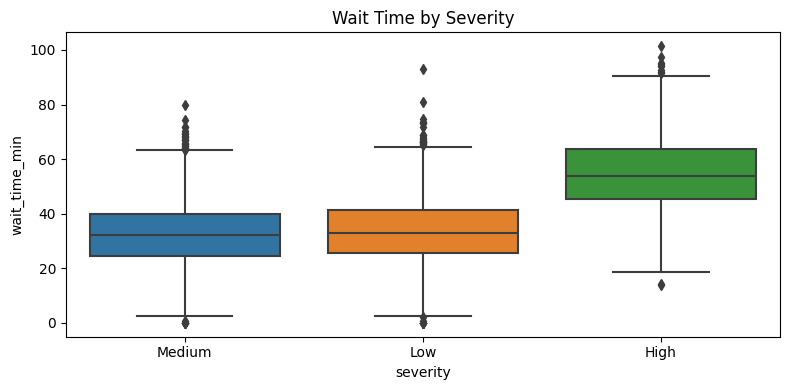

In [45]:
# Boxplot for severity vs wait_time_min
plt.figure(figsize=(8, 4))
sns.boxplot(x='severity', y='wait_time_min', data=df)
plt.title('Wait Time by Severity')
plt.tight_layout()
plt.show()

In [101]:
# IQR for wait_time_min

# Drop rows with missing severity or wait_time_min
df_clean = df.dropna(subset=['severity', 'wait_time_min'])

# Group by severity and calculate Q1, Q3, and IQR
iqr_by_severity = df_clean.groupby('severity')['wait_time_min'].agg(
    Q1=lambda x: x.quantile(0.25),
    Q3=lambda x: x.quantile(0.75)
)

iqr_by_severity['IQR'] = iqr_by_severity['Q3'] - iqr_by_severity['Q1']

print(iqr_by_severity)


              Q1    Q3     IQR
severity                      
High      45.300  63.8  18.500
Low       25.725  41.2  15.475
Medium    24.500  40.0  15.500


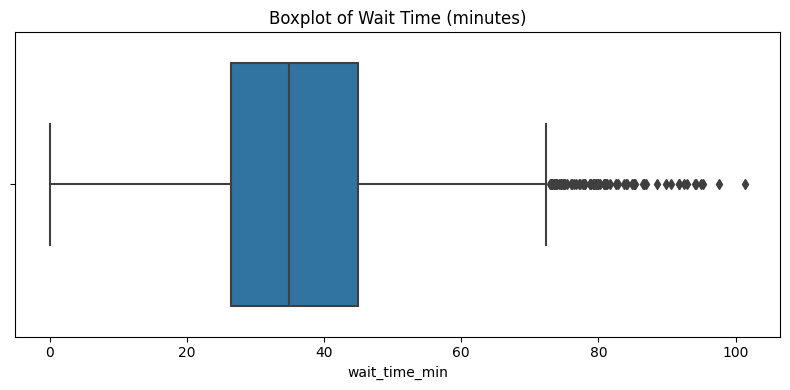

In [46]:
# Boxplot for wait_time_min alone
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['wait_time_min'])
plt.title('Boxplot of Wait Time (minutes)')
plt.tight_layout()
plt.show()


# ➡️Q-Q Plot

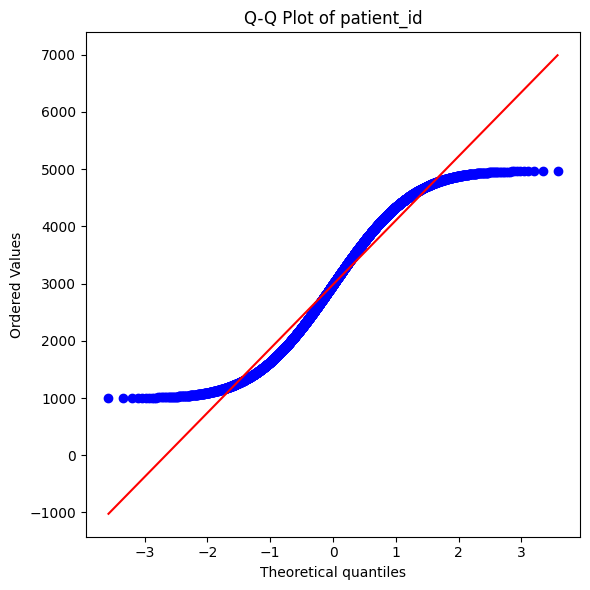

In [51]:
# Q-Q Plot for patient_id
import matplotlib.pyplot as plt
import scipy.stats as stats

plt.figure(figsize=(6, 6))
stats.probplot(df['patient_id'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot of patient_id')
plt.tight_layout()
plt.show()


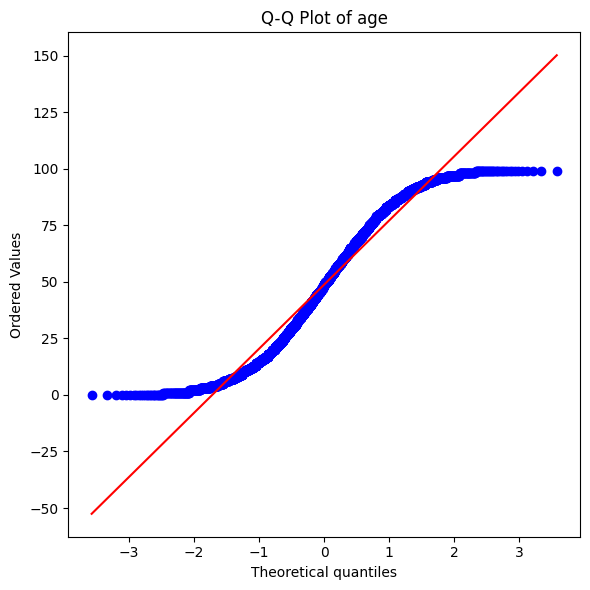

In [52]:
# Q-Q Plot for age
plt.figure(figsize=(6, 6))
stats.probplot(df['age'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot of age')
plt.tight_layout()
plt.show()


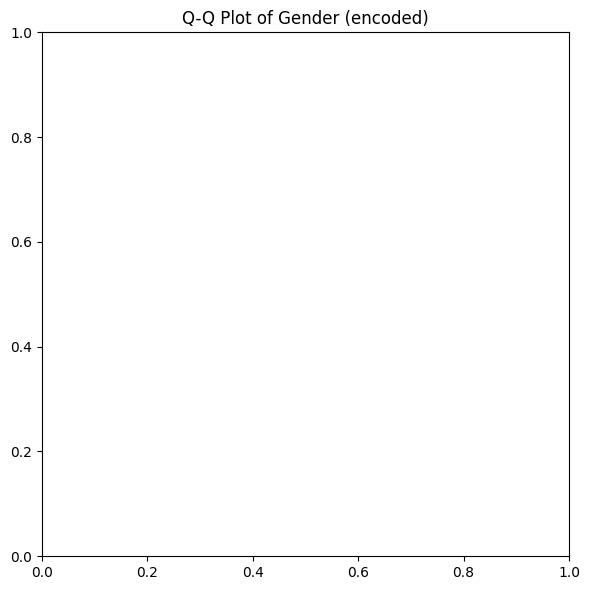

In [57]:
# Q-Q Plot for gender
import matplotlib.pyplot as plt
import scipy.stats as stats

df['gender_encoded'] = df['gender'].map({'Male': 1, 'Female': 2})
plt.figure(figsize=(6, 6))
stats.probplot(df['gender_encoded'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot of Gender (encoded)')
plt.tight_layout()
plt.show()

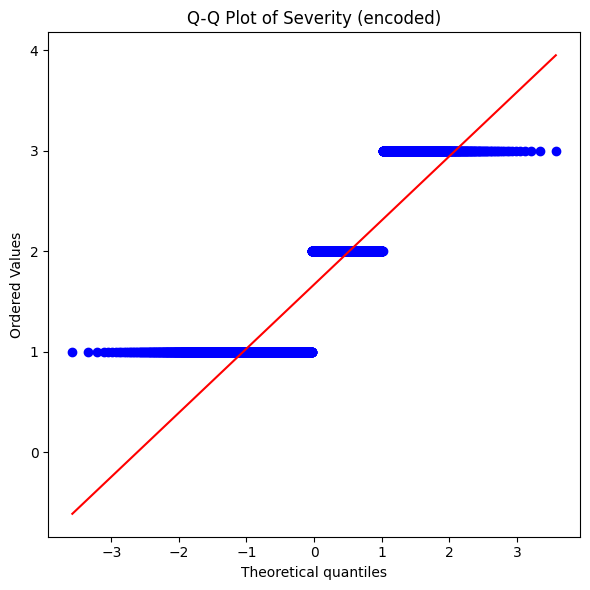

In [59]:
# Q-Q Plot for severity
df['severity_encoded'] = df['severity'].map({'Low': 1, 'Medium': 2, 'High': 3})
plt.figure(figsize=(6, 6))
stats.probplot(df['severity_encoded'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot of Severity (encoded)')
plt.tight_layout()
plt.show()


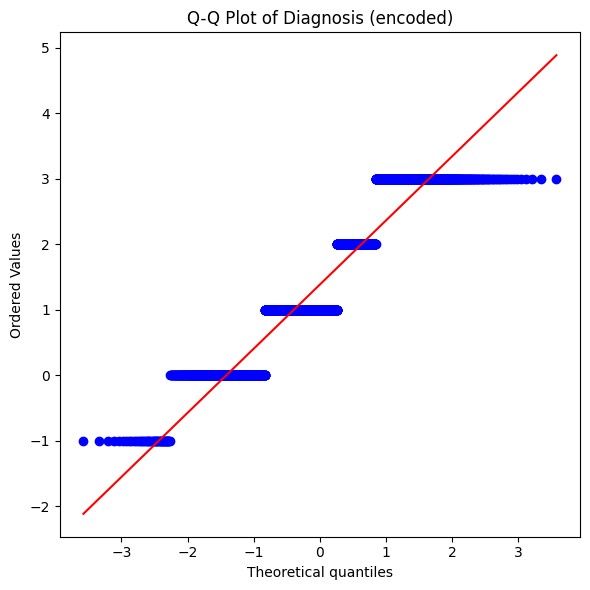

In [61]:
# Q-Q Plot for diagnosis
df['diagnosis_encoded'] = df['diagnosis'].astype('category').cat.codes
plt.figure(figsize=(6, 6))
stats.probplot(df['diagnosis_encoded'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot of Diagnosis (encoded)')
plt.tight_layout()
plt.show()

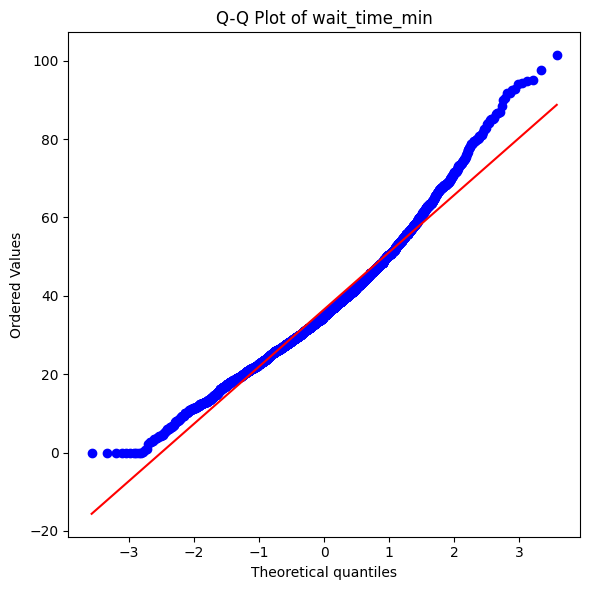

In [53]:
# Q-Q Plot for wait_time_min
plt.figure(figsize=(6, 6))
stats.probplot(df['wait_time_min'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot of wait_time_min')
plt.tight_layout()
plt.show()


# ➡️ Data Preprocessing

# Step 1: Import Required Libraries

In [20]:
import pandas as pd
import numpy as np

# Step 2: Load the CSV File

In [21]:
df = pd.read_csv('patients.csv')

In [22]:
df

,patient_id,admission_date,admission_time,discharge_time,age,gender,diagnosis,severity,wait_time_min,bed_id
0,1000,2025-01-01,2025-01-01 10:24:16.191727,2025-01-04 03:48:58.427951,95,F,Injury,Medium,28.9,62.0
1,1001,2025-01-01,2025-01-01 13:10:53.183831,2025-01-04 01:21:58.340759,57,F,Flu,Low,25.1,1.0
2,1002,2025-01-01,2025-01-01 00:20:43.597418,2025-01-01 06:16:03.729197,21,M,Injury,Low,42.7,62.0
3,1003,2025-01-01,2025-01-01 10:24:44.782494,2025-01-02 10:48:45.349494,47,M,Injury,Low,22.9,69.0
4,1004,2025-01-01,2025-01-01 22:39:12.234634,2025-01-07 17:13:29.680778,18,F,Injury,Medium,39.7,32.0
...,...,...,...,...,...,...,...,...,...,...
3963,4963,2025-04-30,2025-04-30 05:23:47.161241,2025-05-03 16:26:24.443336,65,M,Flu,Low,31.4,45.0
3964,4964,2025-04-30,2025-04-30 00:11:51.909087,2025-04-30 02:32:06.370283,29,M,Injury,Low,46.3,28.0
3965,4965,2025-04-30,2025-04-30 03:43:55.334069,2025-04-30 09:09:25.717291,47,M,Flu,Medium,31.3,80.0
3966,4966,2025-04-30,2025-04-30 17:57:37.940104,2025-05-01 09:52:37.340158,7,F,Flu,Medium,9.7,69.0


# Step 3:Understanding the data

In [23]:
df.head()  # top 5 rows

,patient_id,admission_date,admission_time,discharge_time,age,gender,diagnosis,severity,wait_time_min,bed_id
0,1000,2025-01-01,2025-01-01 10:24:16.191727,2025-01-04 03:48:58.427951,95,F,Injury,Medium,28.9,62.0
1,1001,2025-01-01,2025-01-01 13:10:53.183831,2025-01-04 01:21:58.340759,57,F,Flu,Low,25.1,1.0
2,1002,2025-01-01,2025-01-01 00:20:43.597418,2025-01-01 06:16:03.729197,21,M,Injury,Low,42.7,62.0
3,1003,2025-01-01,2025-01-01 10:24:44.782494,2025-01-02 10:48:45.349494,47,M,Injury,Low,22.9,69.0
4,1004,2025-01-01,2025-01-01 22:39:12.234634,2025-01-07 17:13:29.680778,18,F,Injury,Medium,39.7,32.0


In [24]:
df.info()   # basic information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3968 entries, 0 to 3967
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patient_id      3968 non-null   int64  
 1   admission_date  3968 non-null   object 
 2   admission_time  3968 non-null   object 
 3   discharge_time  3877 non-null   object 
 4   age             3968 non-null   int64  
 5   gender          3968 non-null   object 
 6   diagnosis       3922 non-null   object 
 7   severity        3968 non-null   object 
 8   wait_time_min   3968 non-null   float64
 9   bed_id          3851 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 310.1+ KB


In [25]:
df.shape   # no. of rows and col

(3968, 10)

In [26]:
df.describe()  # Summary Statistics

,patient_id,age,wait_time_min,bed_id
count,3968.000000,3968.000000,3968.000000,3851.000000
mean,2983.500000,48.835181,36.554133,39.835367
std,1145.607263,29.025932,14.759263,23.027751
min,1000.000000,0.000000,0.000000,1.000000
25%,1991.750000,23.000000,26.500000,20.000000
50%,2983.500000,49.000000,34.900000,40.000000
75%,3975.250000,74.000000,45.000000,60.000000
max,4967.000000,99.000000,101.400000,80.000000


In [27]:
df.columns.tolist() # no. of columns

['patient_id',
 'admission_date',
 'admission_time',
 'discharge_time',
 'age',
 'gender',
 'diagnosis',
 'severity',
 'wait_time_min',
 'bed_id']

# Step 4: Check for Missing Values

In [28]:
print(df.isnull().sum())        # Total missing values per column

patient_id          0
admission_date      0
admission_time      0
discharge_time     91
age                 0
gender              0
diagnosis          46
severity            0
wait_time_min       0
bed_id            117
dtype: int64


# Step 5: Clean and Convert Individual Columns


In [29]:
# Check for duplicates
print(df['patient_id'].duplicated().sum())

# Fill or drop if missing
df = df.dropna(subset=['patient_id'])


0


# Conclusion: '0' indicates that Dataset has no duplicates

In [30]:
df['gender'] = df['gender'].str.strip().str.capitalize()
df['gender'] = df['gender'].replace({'M': 'Male', 'F': 'Female'})


In [31]:
print(df['gender'].unique())


['Female' 'Male']


# Standardize Gender Values


In [32]:
df['gender'] = df['gender'].str.strip().str.upper()


# Replace M → Male, F → Female


In [33]:
df['gender'] = df['gender'].replace({'M': 'Male', 'F': 'Female'})


# Verify

In [34]:
print(df['gender'].unique())


['FEMALE' 'MALE']


# After cleaning, save the cleaned DataFrame:



In [35]:
df.to_csv('patients_cleaned.csv', index=False)


# Next time, load the cleaned version:


In [36]:
df = pd.read_csv('patients_cleaned.csv')
df

,patient_id,admission_date,admission_time,discharge_time,age,gender,diagnosis,severity,wait_time_min,bed_id
0,1000,2025-01-01,2025-01-01 10:24:16.191727,2025-01-04 03:48:58.427951,95,FEMALE,Injury,Medium,28.9,62.0
1,1001,2025-01-01,2025-01-01 13:10:53.183831,2025-01-04 01:21:58.340759,57,FEMALE,Flu,Low,25.1,1.0
2,1002,2025-01-01,2025-01-01 00:20:43.597418,2025-01-01 06:16:03.729197,21,MALE,Injury,Low,42.7,62.0
3,1003,2025-01-01,2025-01-01 10:24:44.782494,2025-01-02 10:48:45.349494,47,MALE,Injury,Low,22.9,69.0
4,1004,2025-01-01,2025-01-01 22:39:12.234634,2025-01-07 17:13:29.680778,18,FEMALE,Injury,Medium,39.7,32.0
...,...,...,...,...,...,...,...,...,...,...
3963,4963,2025-04-30,2025-04-30 05:23:47.161241,2025-05-03 16:26:24.443336,65,MALE,Flu,Low,31.4,45.0
3964,4964,2025-04-30,2025-04-30 00:11:51.909087,2025-04-30 02:32:06.370283,29,MALE,Injury,Low,46.3,28.0
3965,4965,2025-04-30,2025-04-30 03:43:55.334069,2025-04-30 09:09:25.717291,47,MALE,Flu,Medium,31.3,80.0
3966,4966,2025-04-30,2025-04-30 17:57:37.940104,2025-05-01 09:52:37.340158,7,FEMALE,Flu,Medium,9.7,69.0


In [37]:
# Check unique values
print(df['diagnosis'].value_counts())

# Optionally: group rare values as "Other"
rare_diag = df['diagnosis'].value_counts()[df['diagnosis'].value_counts() < 10].index
df['diagnosis'] = df['diagnosis'].replace(rare_diag, 'Other')


diagnosis
Flu        1585
Other       793
Injury      785
Chronic     759
Name: count, dtype: int64


In [38]:
df['severity'] = df['severity'].str.strip().str.capitalize()
df['severity'] = df['severity'].replace({
    'low': 'Low', 'medium': 'Medium', 'high': 'High'
})


In [39]:
df

,patient_id,admission_date,admission_time,discharge_time,age,gender,diagnosis,severity,wait_time_min,bed_id
0,1000,2025-01-01,2025-01-01 10:24:16.191727,2025-01-04 03:48:58.427951,95,FEMALE,Injury,Medium,28.9,62.0
1,1001,2025-01-01,2025-01-01 13:10:53.183831,2025-01-04 01:21:58.340759,57,FEMALE,Flu,Low,25.1,1.0
2,1002,2025-01-01,2025-01-01 00:20:43.597418,2025-01-01 06:16:03.729197,21,MALE,Injury,Low,42.7,62.0
3,1003,2025-01-01,2025-01-01 10:24:44.782494,2025-01-02 10:48:45.349494,47,MALE,Injury,Low,22.9,69.0
4,1004,2025-01-01,2025-01-01 22:39:12.234634,2025-01-07 17:13:29.680778,18,FEMALE,Injury,Medium,39.7,32.0
...,...,...,...,...,...,...,...,...,...,...
3963,4963,2025-04-30,2025-04-30 05:23:47.161241,2025-05-03 16:26:24.443336,65,MALE,Flu,Low,31.4,45.0
3964,4964,2025-04-30,2025-04-30 00:11:51.909087,2025-04-30 02:32:06.370283,29,MALE,Injury,Low,46.3,28.0
3965,4965,2025-04-30,2025-04-30 03:43:55.334069,2025-04-30 09:09:25.717291,47,MALE,Flu,Medium,31.3,80.0
3966,4966,2025-04-30,2025-04-30 17:57:37.940104,2025-05-01 09:52:37.340158,7,FEMALE,Flu,Medium,9.7,69.0


In [40]:
df['wait_time_min'] = pd.to_numeric(df['wait_time_min'], errors='coerce')
df = df[df['wait_time_min'] >= 0]


In [41]:
df['bed_id'] = df['bed_id'].astype(str)
df['bed_id'] = df['bed_id'].replace('nan', np.nan)


#    # Final Step: Verify Cleaned Data

In [42]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3968 entries, 0 to 3967
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patient_id      3968 non-null   int64  
 1   admission_date  3968 non-null   object 
 2   admission_time  3968 non-null   object 
 3   discharge_time  3877 non-null   object 
 4   age             3968 non-null   int64  
 5   gender          3968 non-null   object 
 6   diagnosis       3922 non-null   object 
 7   severity        3968 non-null   object 
 8   wait_time_min   3968 non-null   float64
 9   bed_id          3851 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 310.1+ KB


patient_id          0
admission_date      0
admission_time      0
discharge_time     91
age                 0
gender              0
diagnosis          46
severity            0
wait_time_min       0
bed_id            117
dtype: int64

# Next Cleaning Steps


# 🔹 1. Convert admission_date to datetime


In [43]:
df['admission_date'] = pd.to_datetime(df['admission_date'], errors='coerce')
df

,patient_id,admission_date,admission_time,discharge_time,age,gender,diagnosis,severity,wait_time_min,bed_id
0,1000,2025-01-01,2025-01-01 10:24:16.191727,2025-01-04 03:48:58.427951,95,FEMALE,Injury,Medium,28.9,62.0
1,1001,2025-01-01,2025-01-01 13:10:53.183831,2025-01-04 01:21:58.340759,57,FEMALE,Flu,Low,25.1,1.0
2,1002,2025-01-01,2025-01-01 00:20:43.597418,2025-01-01 06:16:03.729197,21,MALE,Injury,Low,42.7,62.0
3,1003,2025-01-01,2025-01-01 10:24:44.782494,2025-01-02 10:48:45.349494,47,MALE,Injury,Low,22.9,69.0
4,1004,2025-01-01,2025-01-01 22:39:12.234634,2025-01-07 17:13:29.680778,18,FEMALE,Injury,Medium,39.7,32.0
...,...,...,...,...,...,...,...,...,...,...
3963,4963,2025-04-30,2025-04-30 05:23:47.161241,2025-05-03 16:26:24.443336,65,MALE,Flu,Low,31.4,45.0
3964,4964,2025-04-30,2025-04-30 00:11:51.909087,2025-04-30 02:32:06.370283,29,MALE,Injury,Low,46.3,28.0
3965,4965,2025-04-30,2025-04-30 03:43:55.334069,2025-04-30 09:09:25.717291,47,MALE,Flu,Medium,31.3,80.0
3966,4966,2025-04-30,2025-04-30 17:57:37.940104,2025-05-01 09:52:37.340158,7,FEMALE,Flu,Medium,9.7,69.0


In [44]:
df.to_csv('patients_cleaned.csv', index=False)
df

,patient_id,admission_date,admission_time,discharge_time,age,gender,diagnosis,severity,wait_time_min,bed_id
0,1000,2025-01-01,2025-01-01 10:24:16.191727,2025-01-04 03:48:58.427951,95,FEMALE,Injury,Medium,28.9,62.0
1,1001,2025-01-01,2025-01-01 13:10:53.183831,2025-01-04 01:21:58.340759,57,FEMALE,Flu,Low,25.1,1.0
2,1002,2025-01-01,2025-01-01 00:20:43.597418,2025-01-01 06:16:03.729197,21,MALE,Injury,Low,42.7,62.0
3,1003,2025-01-01,2025-01-01 10:24:44.782494,2025-01-02 10:48:45.349494,47,MALE,Injury,Low,22.9,69.0
4,1004,2025-01-01,2025-01-01 22:39:12.234634,2025-01-07 17:13:29.680778,18,FEMALE,Injury,Medium,39.7,32.0
...,...,...,...,...,...,...,...,...,...,...
3963,4963,2025-04-30,2025-04-30 05:23:47.161241,2025-05-03 16:26:24.443336,65,MALE,Flu,Low,31.4,45.0
3964,4964,2025-04-30,2025-04-30 00:11:51.909087,2025-04-30 02:32:06.370283,29,MALE,Injury,Low,46.3,28.0
3965,4965,2025-04-30,2025-04-30 03:43:55.334069,2025-04-30 09:09:25.717291,47,MALE,Flu,Medium,31.3,80.0
3966,4966,2025-04-30,2025-04-30 17:57:37.940104,2025-05-01 09:52:37.340158,7,FEMALE,Flu,Medium,9.7,69.0


# Repeat EDA (Post-Cleaning)


# a) Summary statistics

In [102]:
print(df.describe(include='all'))


         patient_id admission_date              admission_time  \
count   3968.000000           3968                        3968   
unique          NaN            120                        3968   
top             NaN     2025-02-25  2025-01-01 10:24:16.191727   
freq            NaN             66                           1   
mean    2983.500000            NaN                         NaN   
std     1145.607263            NaN                         NaN   
min     1000.000000            NaN                         NaN   
25%     1991.750000            NaN                         NaN   
50%     2983.500000            NaN                         NaN   
75%     3975.250000            NaN                         NaN   
max     4967.000000            NaN                         NaN   

                    discharge_time          age gender diagnosis severity  \
count                         3877  3968.000000   3968      3922     3968   
unique                        3877          NaN      

# b) Categorical distributions



<Axes: title={'center': 'Severity Levels'}, xlabel='severity'>

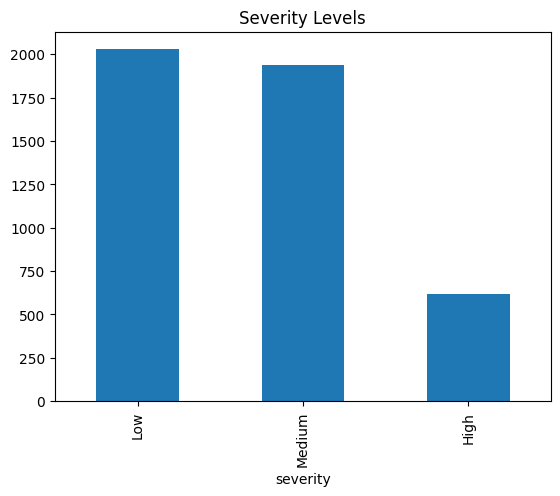

In [46]:
df['gender'].value_counts().plot(kind='bar', title='Gender Distribution')
df['severity'].value_counts().plot(kind='bar', title='Severity Levels')


# c) Boxplots after cleaning


<Axes: xlabel='severity', ylabel='age'>

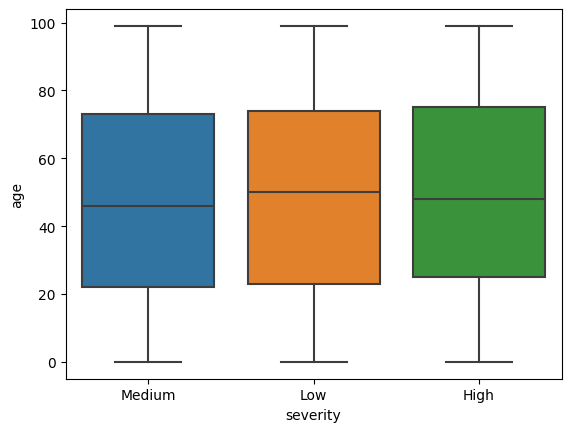

In [47]:
import seaborn as sns
sns.boxplot(x='severity', y='age', data=df)

#  Check Skewness Values


In [48]:
from scipy.stats import skew


In [49]:
print("Skewness of age:", skew(df['age']))
print("Skewness of wait_time_min:", skew(df['wait_time_min']))


Skewness of age: 0.03379594715177007
Skewness of wait_time_min: 0.654989765264808


In [50]:
print(df.select_dtypes(include='number').skew())


patient_id       0.000000
age              0.033809
wait_time_min    0.655237
dtype: float64


# Step-by-Step: Increase Skewness of All Numeric Columns


In [51]:
from scipy.stats import skew


In [52]:
numeric_cols = df.select_dtypes(include='number').columns
skewed_columns = {}

for col in numeric_cols:
    for power in [2, 2.5, 3, 4, 5]:
        transformed = df[col] ** power
        skew_val = skew(transformed)
        if 1 <= skew_val <= 1.5:
            df[col + '_skewed'] = transformed
            skewed_columns[col] = (power, skew_val)
            break


In [53]:
print(df.select_dtypes(include='number').skew())


patient_id           0.000000
age                  0.033809
wait_time_min        0.655237
patient_id_skewed    1.098540
age_skewed           1.090911
dtype: float64


# Descriptive Statistics summarize the main features of the dataset.


In [54]:
print(df.describe(include='all'))


         patient_id                 admission_date  \
count   3968.000000                           3968   
unique          NaN                            NaN   
top             NaN                            NaN   
freq            NaN                            NaN   
mean    2983.500000  2025-02-27 09:09:47.903225600   
min     1000.000000            2025-01-01 00:00:00   
25%     1991.750000            2025-02-03 00:00:00   
50%     2983.500000            2025-02-24 00:00:00   
75%     3975.250000            2025-03-26 00:00:00   
max     4967.000000            2025-04-30 00:00:00   
std     1145.607263                            NaN   

                    admission_time              discharge_time          age  \
count                         3968                        3877  3968.000000   
unique                        3968                        3877          NaN   
top     2025-01-01 10:24:16.191727  2025-01-04 03:48:58.427951          NaN   
freq                             1 

# Perform Univariate, Bivariate, and Multivariate analysis to extract meaningful insights and identify relationships among variables.

In [55]:
import pandas as pd

df = pd.read_csv('patients.csv')
df

,patient_id,admission_date,admission_time,discharge_time,age,gender,diagnosis,severity,wait_time_min,bed_id
0,1000,2025-01-01,2025-01-01 10:24:16.191727,2025-01-04 03:48:58.427951,95,F,Injury,Medium,28.9,62.0
1,1001,2025-01-01,2025-01-01 13:10:53.183831,2025-01-04 01:21:58.340759,57,F,Flu,Low,25.1,1.0
2,1002,2025-01-01,2025-01-01 00:20:43.597418,2025-01-01 06:16:03.729197,21,M,Injury,Low,42.7,62.0
3,1003,2025-01-01,2025-01-01 10:24:44.782494,2025-01-02 10:48:45.349494,47,M,Injury,Low,22.9,69.0
4,1004,2025-01-01,2025-01-01 22:39:12.234634,2025-01-07 17:13:29.680778,18,F,Injury,Medium,39.7,32.0
...,...,...,...,...,...,...,...,...,...,...
3963,4963,2025-04-30,2025-04-30 05:23:47.161241,2025-05-03 16:26:24.443336,65,M,Flu,Low,31.4,45.0
3964,4964,2025-04-30,2025-04-30 00:11:51.909087,2025-04-30 02:32:06.370283,29,M,Injury,Low,46.3,28.0
3965,4965,2025-04-30,2025-04-30 03:43:55.334069,2025-04-30 09:09:25.717291,47,M,Flu,Medium,31.3,80.0
3966,4966,2025-04-30,2025-04-30 17:57:37.940104,2025-05-01 09:52:37.340158,7,F,Flu,Medium,9.7,69.0


In [62]:
df['gender'] = df['gender'].str.strip().str.upper()


In [63]:
df['gender'] = df['gender'].replace({'M': 'Male', 'F': 'Female'})


In [64]:
print(df['gender'].unique())


['Female' 'Male']


In [66]:
df.to_csv('patients_cleaned.csv', index=False)
df

,patient_id,admission_date,admission_time,discharge_time,age,gender,diagnosis,severity,wait_time_min,bed_id
0,1000,2025-01-01,2025-01-01 10:24:16.191727,2025-01-04 03:48:58.427951,95,Female,Injury,Medium,28.9,62.0
1,1001,2025-01-01,2025-01-01 13:10:53.183831,2025-01-04 01:21:58.340759,57,Female,Flu,Low,25.1,1.0
2,1002,2025-01-01,2025-01-01 00:20:43.597418,2025-01-01 06:16:03.729197,21,Male,Injury,Low,42.7,62.0
3,1003,2025-01-01,2025-01-01 10:24:44.782494,2025-01-02 10:48:45.349494,47,Male,Injury,Low,22.9,69.0
4,1004,2025-01-01,2025-01-01 22:39:12.234634,2025-01-07 17:13:29.680778,18,Female,Injury,Medium,39.7,32.0
...,...,...,...,...,...,...,...,...,...,...
3963,4963,2025-04-30,2025-04-30 05:23:47.161241,2025-05-03 16:26:24.443336,65,Male,Flu,Low,31.4,45.0
3964,4964,2025-04-30,2025-04-30 00:11:51.909087,2025-04-30 02:32:06.370283,29,Male,Injury,Low,46.3,28.0
3965,4965,2025-04-30,2025-04-30 03:43:55.334069,2025-04-30 09:09:25.717291,47,Male,Flu,Medium,31.3,80.0
3966,4966,2025-04-30,2025-04-30 17:57:37.940104,2025-05-01 09:52:37.340158,7,Female,Flu,Medium,9.7,69.0


In [67]:
df.to_csv('patients_cleaned.csv', index=False)
df

,patient_id,admission_date,admission_time,discharge_time,age,gender,diagnosis,severity,wait_time_min,bed_id
0,1000,2025-01-01,2025-01-01 10:24:16.191727,2025-01-04 03:48:58.427951,95,Female,Injury,Medium,28.9,62.0
1,1001,2025-01-01,2025-01-01 13:10:53.183831,2025-01-04 01:21:58.340759,57,Female,Flu,Low,25.1,1.0
2,1002,2025-01-01,2025-01-01 00:20:43.597418,2025-01-01 06:16:03.729197,21,Male,Injury,Low,42.7,62.0
3,1003,2025-01-01,2025-01-01 10:24:44.782494,2025-01-02 10:48:45.349494,47,Male,Injury,Low,22.9,69.0
4,1004,2025-01-01,2025-01-01 22:39:12.234634,2025-01-07 17:13:29.680778,18,Female,Injury,Medium,39.7,32.0
...,...,...,...,...,...,...,...,...,...,...
3963,4963,2025-04-30,2025-04-30 05:23:47.161241,2025-05-03 16:26:24.443336,65,Male,Flu,Low,31.4,45.0
3964,4964,2025-04-30,2025-04-30 00:11:51.909087,2025-04-30 02:32:06.370283,29,Male,Injury,Low,46.3,28.0
3965,4965,2025-04-30,2025-04-30 03:43:55.334069,2025-04-30 09:09:25.717291,47,Male,Flu,Medium,31.3,80.0
3966,4966,2025-04-30,2025-04-30 17:57:37.940104,2025-05-01 09:52:37.340158,7,Female,Flu,Medium,9.7,69.0


# ✅ 1. Univariate Analysis (one variable at a time)


In [80]:
numerical_cols = ['patient_id', 'age', 'wait_time_min']
numerical_cols

['patient_id', 'age', 'wait_time_min']

In [81]:
categorical_cols = ['gender', 'diagnosis', 'severity', 'bed_id']
categorical_cols

['gender', 'diagnosis', 'severity', 'bed_id']

# Numerical – Histogram & Q-Q Plot


C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


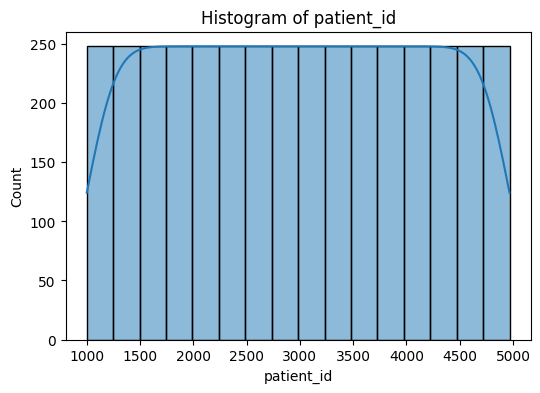

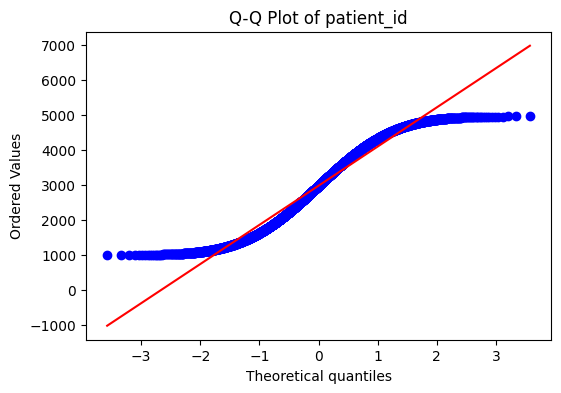

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


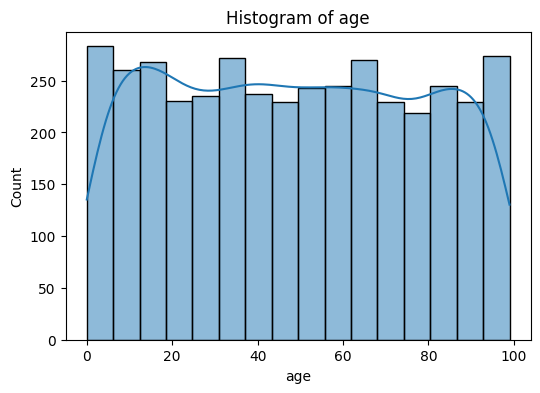

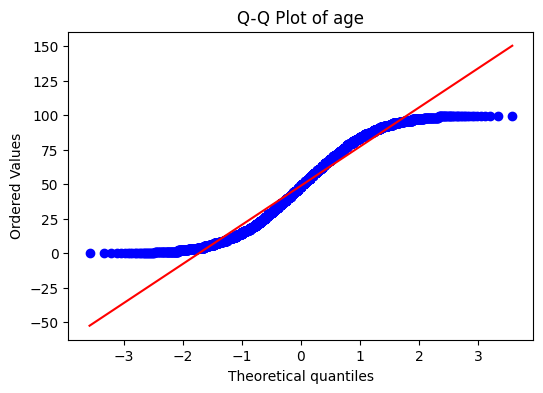

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


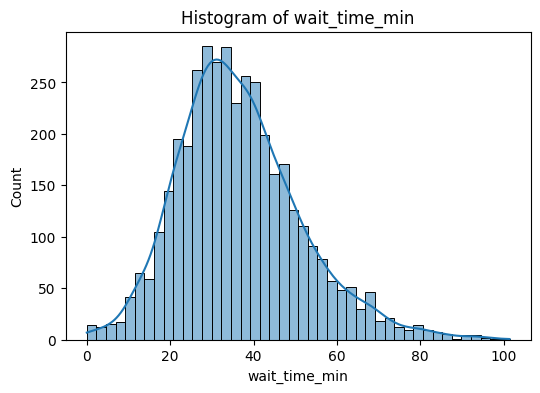

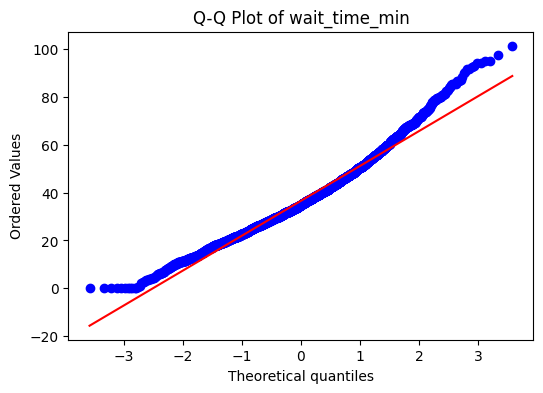

In [82]:
for col in numerical_cols:
    # Histogram
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

    # Q-Q Plot
    plt.figure(figsize=(6, 4))
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col}')
    plt.show()


# ➤ Categorical – Countplot


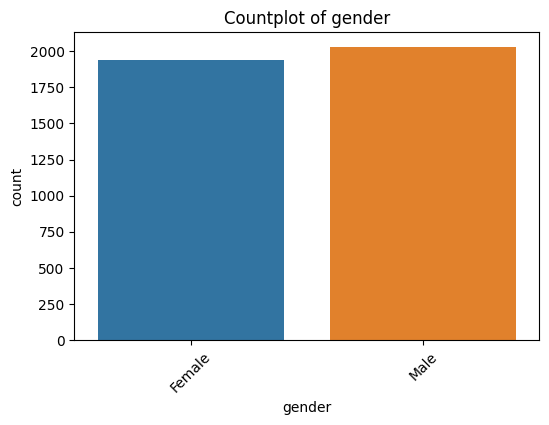

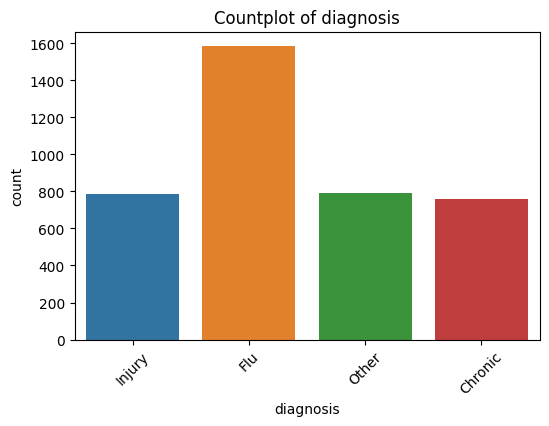

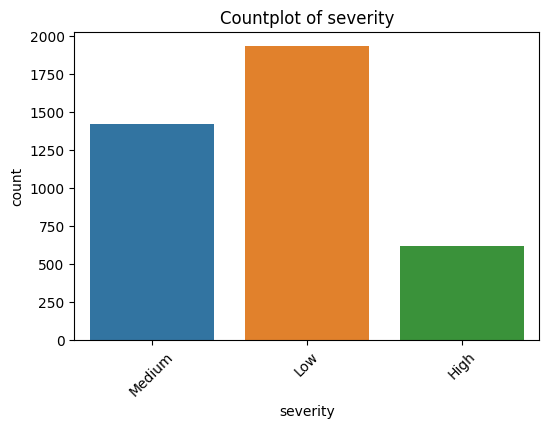

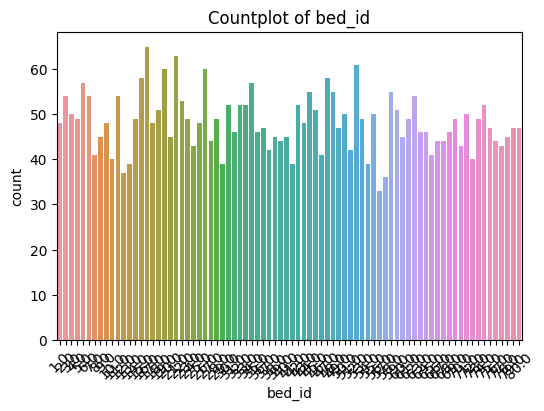

In [83]:
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
    plt.show()


# 2.✅ Bivariate Analysis

# ➤ Boxplots (Numeric vs Categorical)


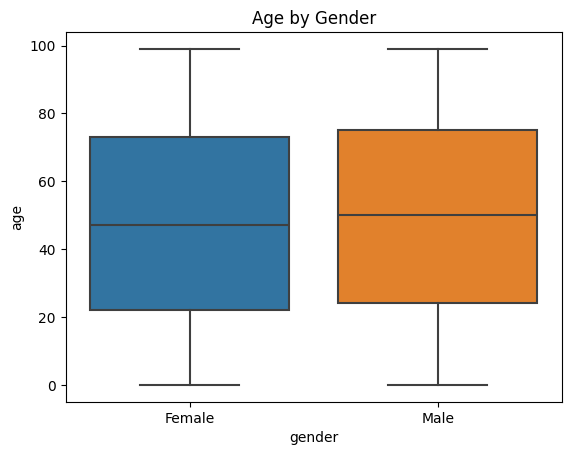

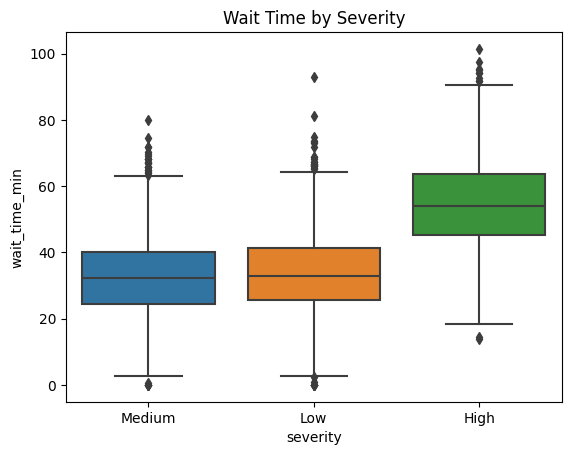

In [84]:
sns.boxplot(x='gender', y='age', data=df)
plt.title("Age by Gender")
plt.show()

sns.boxplot(x='severity', y='wait_time_min', data=df)
plt.title("Wait Time by Severity")
plt.show()


# ➤ Histograms by Category (stacked)



C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

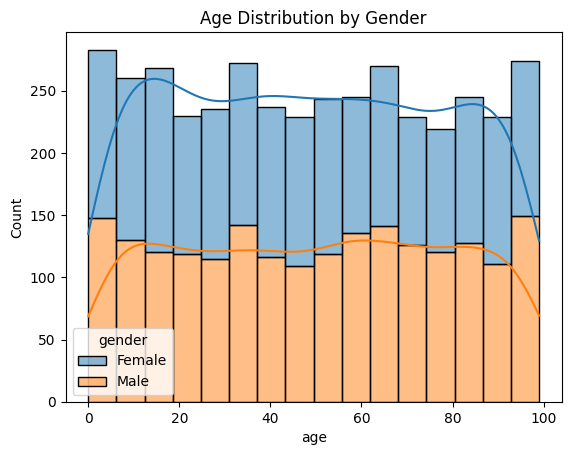

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

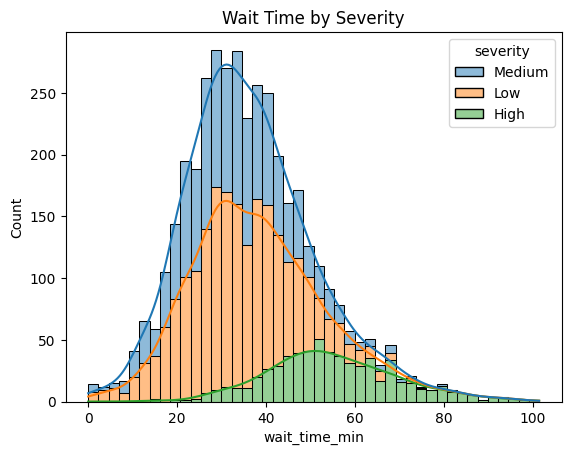

In [85]:
sns.histplot(data=df, x='age', hue='gender', kde=True, multiple='stack')
plt.title("Age Distribution by Gender")
plt.show()

sns.histplot(data=df, x='wait_time_min', hue='severity', kde=True, multiple='stack')
plt.title("Wait Time by Severity")
plt.show()


# ➤ Q-Q Plot by Category


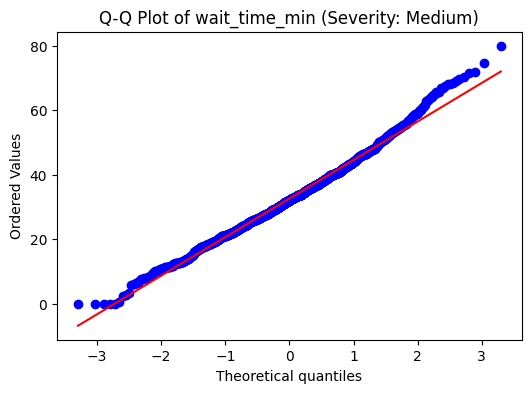

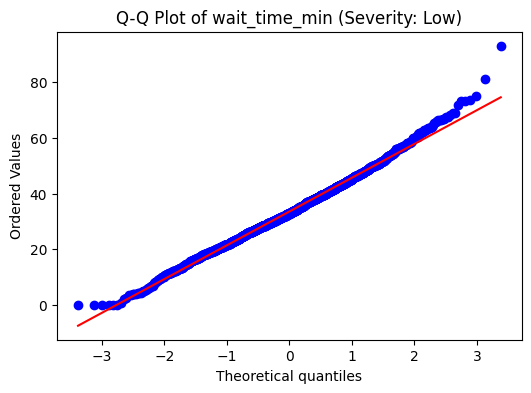

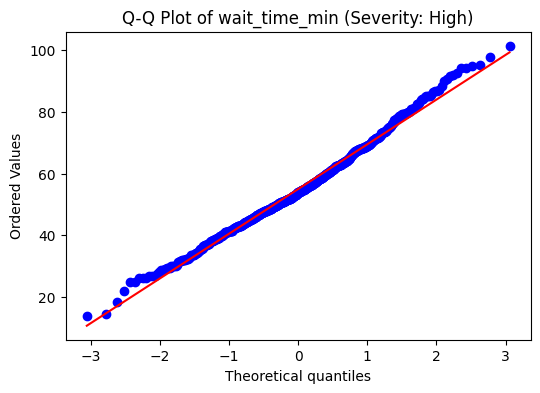

In [86]:
# Q-Q Plot of wait_time_min by severity level
for level in df['severity'].dropna().unique():
    plt.figure(figsize=(6,4))
    stats.probplot(df[df['severity'] == level]['wait_time_min'], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of wait_time_min (Severity: {level})")
    plt.show()


# 3. ✅ Multivariate Analysis

# ➤ Pairplot with hue (Category)


C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

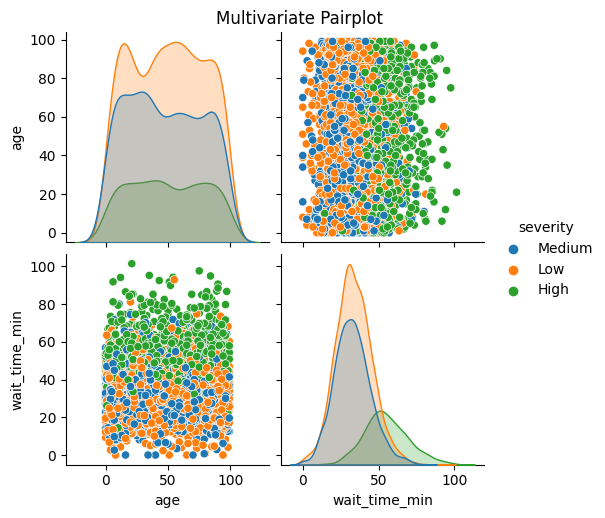

In [88]:
sns.pairplot(df[['age', 'wait_time_min', 'severity']], hue='severity')
plt.suptitle("Multivariate Pairplot", y=1.02)
plt.show()


# ➤ Grouped Analysis (Table)


In [90]:
grouped = df.groupby(['gender', 'severity'])['wait_time_min'].mean().unstack()
print("Average Wait Time by Gender & Severity:\n", grouped)


Average Wait Time by Gender & Severity:
 severity       High        Low     Medium
gender                                   
Female    55.850000  32.765576  32.392735
Male      54.188379  34.327772  32.848122


# ✅ Summary of Insights We Can Extract:


| Type         | Insight Example                                  |
| ------------ | ------------------------------------------------ |
| Univariate   | Most patients are between 30-50 years old        |
| Bivariate    | Males may have slightly longer wait times        |
| Multivariate | Female patients with "High" severity waited less |
